<a href="https://colab.research.google.com/github/Mandloi1/projectwork/blob/master/Pro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier

In [17]:
Data =pd.read_csv("data.csv")
Data.head()

,X_FERET,Y_FERET,DAVE,DMAX,DMIN,DPERP,ASPECT,AREA,PERIMETER,(Mg/Al),Class
0,2.99990,3.58322,3.29594,3.76466,2.58417,2.58417,1.45682,6.98565,12.001600,0.396947,0
1,2.33326,2.08327,2.27187,2.66788,1.48360,1.48360,1.79825,2.77760,7.742380,0.457447,0
2,7.83308,6.83311,7.25698,7.81399,6.81158,6.81158,1.14716,34.69220,29.452801,0.478079,0
3,1.83327,1.74994,1.73706,1.79886,1.73710,1.73710,1.03556,2.20124,6.644780,0.402041,0
4,7.33309,8.41639,8.39133,8.94592,5.48010,6.61726,1.63244,35.86570,34.866798,0.408537,0


In [18]:
Data.describe()

,X_FERET,Y_FERET,DAVE,DMAX,DMIN,DPERP,ASPECT,AREA,PERIMETER,(Mg/Al),Class
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,3.756688,3.817784,3.996253,4.407264,2.956796,3.002012,1.552951,10.404225,15.336524,0.382474,0.021635
std,2.124756,1.904816,2.154919,2.371287,1.591983,1.586973,0.570683,14.107897,10.016187,0.195499,0.145662
min,1.249960,1.249960,1.274790,1.455310,0.668402,0.668402,1.006800,1.034650,5.132990,0.000000,0.000000
25%,2.333260,2.583250,2.548460,2.866112,1.955805,1.985015,1.202222,3.954600,9.548790,0.379159,0.000000
50%,3.249890,3.416550,3.470475,3.784895,2.692495,2.733415,1.370040,6.780805,12.812250,0.423115,0.000000
75%,4.416520,4.416520,4.694853,5.238733,3.506182,3.634710,1.700100,12.701425,17.806801,0.448065,0.000000
max,19.832701,16.832800,18.147800,19.767500,16.858801,16.858801,5.076360,218.263000,118.197998,2.454545,1.000000


In [19]:
X = Data.drop(['(Mg/Al)','Class'], axis = 1)
y = Data['Class']

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [21]:
# Instantiating the classifier 
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=4)

# Fitting the instantiator 
rfr.fit(X_train, y_train)

# Printing the training and testing accuracies 
print('The training error is {0:.2f}'.format(mean_absolute_error(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mean_absolute_error(y_test, rfr.predict(X_test))))
rfr.get_params()

The training error is 0.02
The testing error is 0.04


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1111,
 'verbose': 0,
 'warm_start': False}

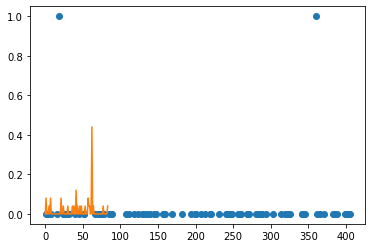

In [22]:
plt.plot(y_test, 'o')
plt.plot(rfr.predict(X_test))

In [37]:
print(X.shape)
print(y.shape)

(416, 9)
(416,)


In [38]:
Y = np.array(y).reshape((-1,1))

In [39]:
print(Y.shape)

(416, 1)


ValueError: ignored

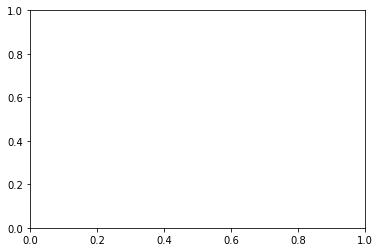

In [40]:
plt.scatter(X, Y)
plt.show()

In [23]:
model = LinearRegression(normalize=False)

In [24]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.04824417546792376
slope: [ 0.00938864  0.0093174   0.03190096 -0.07124117 -0.05129569  0.03395818
  0.00763051  0.00022924  0.00812022]


In [26]:
y_pred = model.predict(X)
print(y_pred)
print(y_pred.ndim)

[ 1.21105396e-02  2.34791064e-02 -1.94663100e-03  4.12685143e-02
  7.32932753e-02 -1.54288041e-02  3.57144969e-02  2.54703696e-02
  2.46465202e-03  5.21764886e-02  2.53760702e-03  2.16005944e-02
  4.13292402e-02  2.44426384e-02  1.31067317e-02  2.84450156e-02
 -6.27867743e-03 -9.36439334e-04  5.64796108e-02 -1.24284219e-02
  7.11675633e-02  6.27490799e-02 -4.62730680e-02  3.45476787e-02
  2.47913729e-02  3.74231315e-02  3.65090168e-03 -1.40259962e-02
  3.85504173e-02 -8.61004381e-03  3.25240589e-02  3.15502944e-02
  4.88964688e-02  4.93496522e-02 -4.08417607e-03  2.92639476e-02
  4.20536978e-02 -6.30336265e-03  1.91971418e-02  3.47227399e-02
  3.58262920e-02  2.29163756e-02  3.96245490e-02  2.54313148e-02
  6.58025817e-03  6.21206918e-02  3.08154720e-02  2.46522081e-02
  3.77985468e-03  2.39236335e-02  4.12982996e-02  2.46405167e-02
 -4.88226492e-03  9.83281292e-03 -1.52182719e-02  1.47267505e-02
  3.72172220e-02  7.57499267e-02  2.25411757e-02  2.54932892e-02
  3.28150765e-02 -9.33558

ValueError: ignored

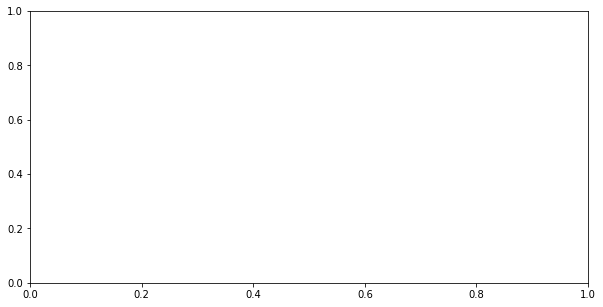

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=0, fontsize=10)
plt.show()